In [661]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_regression 


In [662]:
X , y  = make_regression(n_samples = 300 , n_features = 2 , noise = 40 ,  n_targets = 1 , random_state = None )

In [663]:
X.shape

(300, 2)

In [664]:
y.shape

(300,)

In [665]:
df = pd.DataFrame(data = {
    'feature1' : X[: , 0] , 
    'feature2' : X[: , 1] ,
    'target' : y
})
df

,feature1,feature2,target
0,1.687226,-0.800939,21.316208
1,1.240428,0.442071,77.659374
2,1.099043,-1.276277,-19.047030
3,-0.812843,0.720167,-16.743417
4,0.426853,0.902762,97.943785
...,...,...,...
295,1.076902,0.690301,128.913051
296,2.292712,0.507380,105.202398
297,0.485693,-0.450286,9.942243
298,-2.777214,-0.647690,-104.067924


In [666]:
from plotly import express as px  
px.scatter_3d( df , x = 'feature1' , y = 'feature2' , z = 'target')

In [667]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=42)

In [668]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipe = Pipeline(steps = [
    ('scaler' , StandardScaler() ) , 
    ('linear_model' , LinearRegression())
])

In [669]:
pipe.fit(x_train , y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_model', LinearRegression())])

In [670]:
from sklearn.metrics import r2_score
y_pred = pipe.predict(x_test)
r2_score(y_test , y_pred)

0.49592478842446996

In [671]:
class olsMethod : 
    def __init__(self):
        self.coefficients = None 
    def fit(self , x_train , y_train) : 
        x_train = np.insert(x_train , 0 , 1, axis = 1)
        inv = np.linalg.inv(np.dot(x_train.T , x_train))
        last = np.dot(x_train.T , y_train)
        self.coefficients = np.dot(inv.T , last)
    def predict(self , x_test) : 
        x_test = np.insert(x_test 	, 0 	, 1 , axis 	= 1 )
        return np.dot(x_test ,self.coefficients)


In [672]:
ols = olsMethod()
ols.fit(x_train , y_train)
ols.coefficients

array([-1.27234291, 22.26478681, 27.60033377])

In [673]:
y_pred= ols.predict(x_test)
r2_score(y_test , y_pred)

0.49592478842446996

In [674]:
class BatchGradientDescent : 
    def __init__(self , epoch , lr ) : 
        self.epoch = epoch 
        self.lr = lr 
        self.coefficients = None 
        self.intercept = None 
    
    def fit(self , x_train , y_train) : 
        self.intercept = 0 
        self.coefficients = np.ones(x_train.shape[1])

        for i in range(self.epoch) : 
            y_hat = np.dot(x_train , self.coefficients) + self.intercept

            gradientIntercept = 2 * np.mean(y_hat - y_train)
            self.intercept = self.intercept - self.lr * gradientIntercept

            coefIntercept = 2 * np.sum(np.dot((y_hat - y_train) ,  x_train))/ len(x_train)
            self.coefficients -= self.lr * coefIntercept

    def predict(self , x_test) : 
        return np.dot(x_test , self.coefficients) + self.intercept

In [695]:
bg = BatchGradientDescent(100 , 0.1)
bg.fit(x_train , y_train)
r2_score(y_test , bg.predict(x_test))

0.5059359723783978

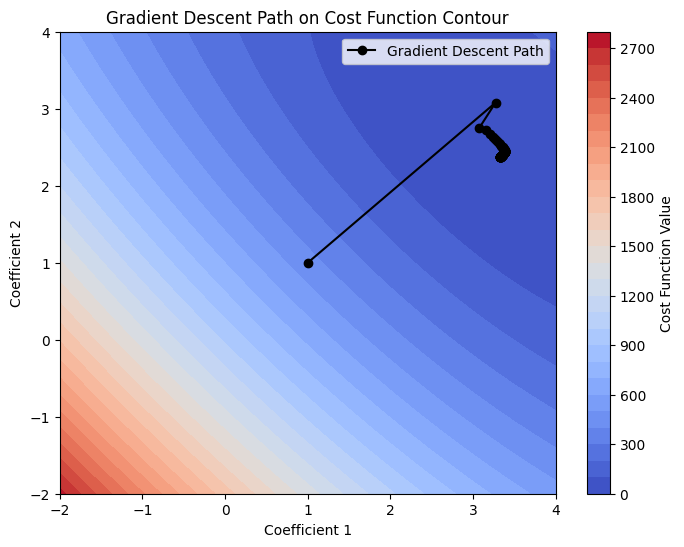

In [698]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class BatchGradientDescent:
    def __init__(self, epoch, lr):
        self.epoch = epoch
        self.lr = lr
        self.coefficients = None
        self.intercept = None
        self.history = []  # Store coefficient updates

    def fit(self, x_train, y_train):
        self.intercept = 0
        self.coefficients = np.ones(x_train.shape[1])

        for _ in range(self.epoch):
            y_hat = np.dot(x_train, self.coefficients) + self.intercept
            
            # Compute gradients
            gradientIntercept = 2 * np.mean(y_hat - y_train)
            gradientCoefficients = 2 * np.dot((y_hat - y_train), x_train) / len(x_train)

            # Store current coefficients for visualization
            self.history.append((self.coefficients[0], self.coefficients[1], self.intercept))

            # Update parameters
            self.intercept -= self.lr * gradientIntercept
            self.coefficients -= self.lr * gradientCoefficients

    def predict(self, x_test):
        return np.dot(x_test, self.coefficients) + self.intercept

    def plot_contour(self, x_train, y_train):
        """Plot the cost function contour with gradient descent path"""
        # Generate meshgrid for cost function
        theta0_vals = np.linspace(-2, 4, 100)
        theta1_vals = np.linspace(-2, 4, 100)
        J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

        for i in range(len(theta0_vals)):
            for j in range(len(theta1_vals)):
                theta = np.array([theta0_vals[i], theta1_vals[j]])
                y_pred = np.dot(x_train, theta)
                J_vals[i, j] = np.mean((y_pred - y_train) ** 2)

        # Create contour plot
        plt.figure(figsize=(8, 6))
        plt.contourf(theta0_vals, theta1_vals, J_vals.T, levels=30, cmap="coolwarm")
        plt.colorbar(label="Cost Function Value")

        # Plot gradient descent path
        history_array = np.array(self.history)
        plt.plot(history_array[:, 0], history_array[:, 1], marker="o", color="black", label="Gradient Descent Path")
        plt.xlabel("Coefficient 1")
        plt.ylabel("Coefficient 2")
        plt.title("Gradient Descent Path on Cost Function Contour")
        plt.legend()
        plt.show()

# Generate Sample Data with Two Features
np.random.seed(42)
n_samples = 100
x_train = np.random.rand(n_samples, 2) * 10  # Two features
y_train = 3 * x_train[:, 0] + 2 * x_train[:, 1] + 5 + np.random.randn(n_samples) * 2  # Linear relation with noise

# Train Model
bg = BatchGradientDescent(epoch=100, lr=0.01)
bg.fit(x_train, y_train)
bg.plot_contour(x_train, y_train)


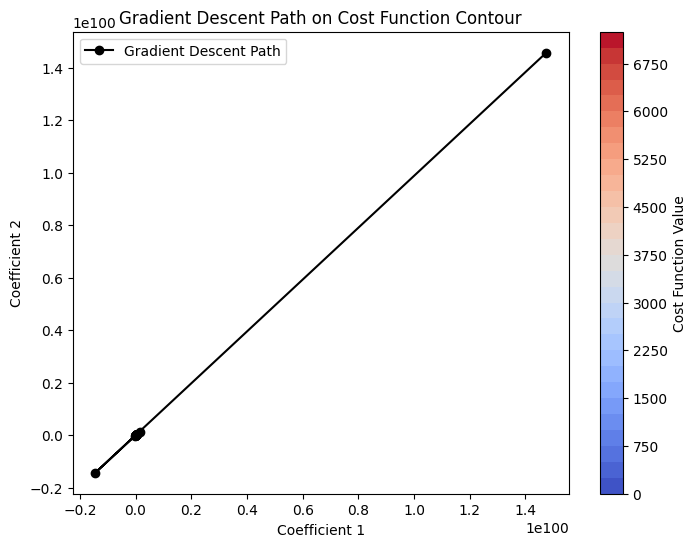

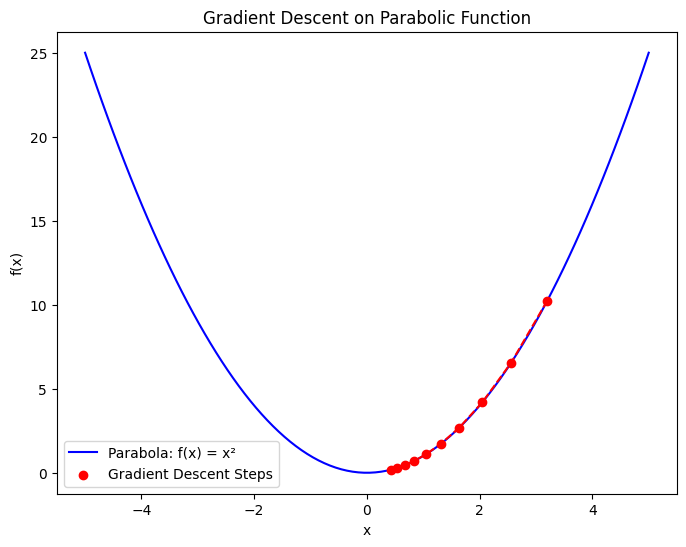

In [699]:
import numpy as np
import matplotlib.pyplot as plt

class BatchGradientDescent:
    def __init__(self, epoch, lr):
        self.epoch = epoch
        self.lr = lr
        self.coefficients = None
        self.intercept = None
        self.history = []  # Store coefficient updates

    def fit(self, x_train, y_train):
        self.intercept = 0
        self.coefficients = np.ones(x_train.shape[1])

        for _ in range(self.epoch):
            y_hat = np.dot(x_train, self.coefficients) + self.intercept
            
            # Compute gradients
            gradientIntercept = 2 * np.mean(y_hat - y_train)
            gradientCoefficients = 2 * np.dot((y_hat - y_train), x_train) / len(x_train)

            # Store current coefficients for visualization
            self.history.append((self.coefficients[0], self.coefficients[1], self.intercept))

            # Update parameters
            self.intercept -= self.lr * gradientIntercept
            self.coefficients -= self.lr * gradientCoefficients

    def plot_contour(self, x_train, y_train):
        """Plot the cost function contour with gradient descent path"""
        theta0_vals = np.linspace(-5, 5, 100)
        theta1_vals = np.linspace(-5, 5, 100)
        J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

        for i in range(len(theta0_vals)):
            for j in range(len(theta1_vals)):
                theta = np.array([theta0_vals[i], theta1_vals[j]])
                y_pred = np.dot(x_train, theta)
                J_vals[i, j] = np.mean((y_pred - y_train) ** 2)

        plt.figure(figsize=(8, 6))
        plt.contourf(theta0_vals, theta1_vals, J_vals.T, levels=30, cmap="coolwarm")
        plt.colorbar(label="Cost Function Value")

        history_array = np.array(self.history)
        plt.plot(history_array[:, 0], history_array[:, 1], marker="o", color="black", label="Gradient Descent Path")
        plt.xlabel("Coefficient 1")
        plt.ylabel("Coefficient 2")
        plt.title("Gradient Descent Path on Cost Function Contour")
        plt.legend()
        plt.show()

    def plot_parabola(self):
        """Plot a simple 2D parabolic function and show descent"""
        x_vals = np.linspace(-5, 5, 100)
        y_vals = x_vals**2  # Parabola: f(x) = x^2

        plt.figure(figsize=(8, 6))
        plt.plot(x_vals, y_vals, label="Parabola: f(x) = x²", color="blue")
        
        # Simulating gradient descent
        x_current = 4  # Start from x=4
        points = []
        for _ in range(10):
            gradient = 2 * x_current  # Derivative of x² is 2x
            x_current -= self.lr * gradient
            points.append((x_current, x_current**2))

        # Plot gradient descent path
        points = np.array(points)
        plt.scatter(points[:, 0], points[:, 1], color="red", label="Gradient Descent Steps", zorder=3)
        plt.plot(points[:, 0], points[:, 1], linestyle="dashed", color="red")

        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.title("Gradient Descent on Parabolic Function")
        plt.legend()
        plt.show()

# Generate Sample Data with Two Features
np.random.seed(42)
n_samples = 100
x_train = np.random.rand(n_samples, 2) * 10
y_train = 3 * x_train[:, 0] + 2 * x_train[:, 1] + 5 + np.random.randn(n_samples) * 2

# Train Model
bg = BatchGradientDescent(epoch=100, lr=0.1)
bg.fit(x_train, y_train)

# Visualizations
bg.plot_contour(x_train, y_train)
bg.plot_parabola()
